# **Task 3: Customer Segmentation**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score

In [2]:
customers = pd.read_csv('/content/Customers.csv')

In [3]:
products = pd.read_csv('/content/Products.csv')

In [4]:
transactions = pd.read_csv('/content/Transactions.csv')

In [7]:
# Data Preparation (# Feature Engineering)
customer_transactions = transactions.merge(customers, on='CustomerID')
customer_features = customer_transactions.groupby('CustomerID').agg({
    'TotalValue': 'sum',
    'Quantity': 'sum',
    'TransactionDate': 'count'
}).reset_index()

In [8]:
# Standardize features
scaler = StandardScaler()
customer_features_scaled = scaler.fit_transform(customer_features[['TotalValue', 'Quantity', 'TransactionDate']])

In [9]:
# Determining optimal number of clusters (using Elbow method)
inertia = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(customer_features_scaled)
    inertia.append(kmeans.inertia_)

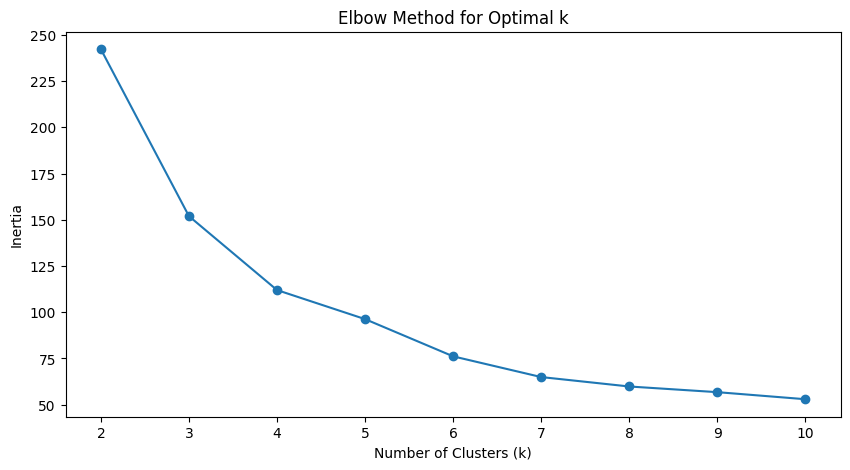

In [10]:
plt.figure(figsize=(10, 5))
plt.plot(range(2, 11), inertia, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.show()

In [11]:
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(customer_features_scaled)

KMeans(n_clusters=3, random_state=42)

In [12]:
# Calculate DB Index
db_index = davies_bouldin_score(customer_features_scaled, kmeans.labels_)
print(f"DB Index: {db_index}")

DB Index: 0.7726853895682169


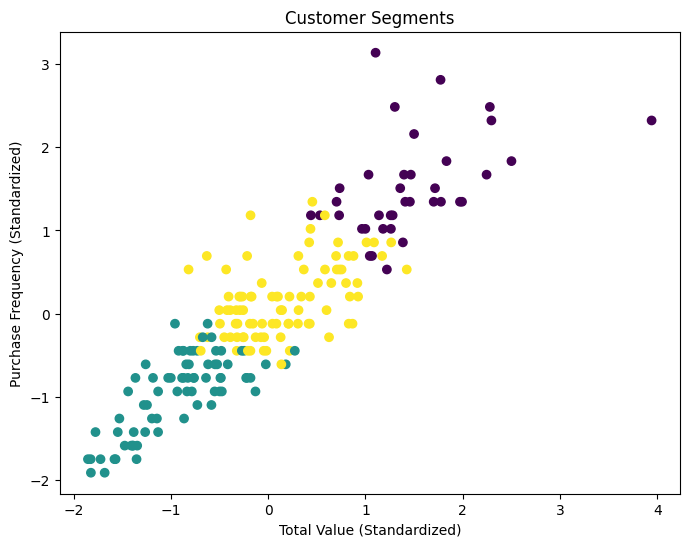

In [13]:
# Visualize clusters
plt.figure(figsize=(8, 6))
plt.scatter(customer_features_scaled[:, 0], customer_features_scaled[:, 1], c=kmeans.labels_, cmap='viridis')
plt.title('Customer Segments')
plt.xlabel('Total Value (Standardized)')
plt.ylabel('Purchase Frequency (Standardized)')
plt.show()

In [14]:
# Adding cluster assignments to customer data
customer_features['Cluster'] = kmeans.labels_

In [15]:
# Cluster column is converted to numeric
try:
  customer_features['Cluster'] = pd.to_numeric(customer_features['Cluster'])
except:
  # Handle potential conversion errors (e.g., non-numeric characters)
  print("Warning: Cluster labels might contain non-numeric characters. Consider encoding or cleaning them.")

In [16]:
# Analyze cluster characteristics
numeric_features = customer_features.select_dtypes(include=np.number)
print(numeric_features.groupby(customer_features['Cluster']).mean())

          TotalValue   Quantity  TransactionDate  Cluster
Cluster                                                  
0        6136.099189  22.027027         8.162162      0.0
1        1795.821351   6.932432         2.905405      1.0
2        3750.785341  13.738636         5.488636      2.0
